# Nonlinear Poisson problem

In this example we solve the following Nonlinear Poisson problem with Robin boundary conditions:

$$\begin{cases}
-\nabla \cdot \kappa(u)\nabla u = f & \text{in}~\Omega \\
\left(\kappa(u) \nabla u\right) \cdot n + u = 0 & \text{on}~ \partial \Omega
\end{cases}$$

where 
$$
\kappa(u) := 1 + u^2, \qquad f(x,y) := \sin(x) \cos(y),
$$
and $n$ is the unit normal to the boundary.

Mulitplying both sides of the PDE by a test function $v$ and integrating over $\Omega$ yields
$$
-\int_\Omega v \nabla \cdot \kappa(u)\nabla u dx = \int_\Omega v f dx. \quad(1)
$$
By the fundamental theorem of the calculus of variations, and modulo some conditions on the function spaces that $u$ and $v$ reside in, equation (1) holds for all test functions $v$ if and only if $-\nabla \cdot \kappa(u)\nabla u = f$ holds almost everywhere in $\Omega$.

Integrating the integral on the left hand side of (1) by parts yields
$$
\int_\Omega \kappa(u) \nabla v \cdot \nabla u dx - \int_{\partial \Omega} v \left(\kappa(u) \nabla u\right) \cdot n ds  = \int_\Omega v f dx. \quad(2)
$$
Using the Robin boundary conditions in the second term on the left hand side of (2), we arrive at the following weak form of the PDE:
$$
\int_\Omega \kappa(u) \nabla v \cdot \nabla u dx + \int_{\partial \Omega} v u ds  = \int_\Omega v f dx. \quad(3)
$$




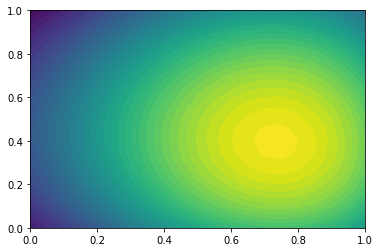

In [1]:
import numpy as np
import dolfin as dl

mesh = dl.UnitSquareMesh(20,20) # 20x20 grid of cells in the mesh
V = dl.FunctionSpace(mesh, 'CG', 1)

u = dl.Function(V)
v_test = dl.TestFunction(V)

f = dl.Expression('sin(x[0])*cos(x[1])', degree=3)
kappa = dl.Constant(1.0) + u**2

stiffness_form_term1 = kappa * dl.inner(dl.grad(u), dl.grad(v_test)) * dl.dx # dx means integrate over the domain
stiffness_form_term2 = u * v_test * dl.ds # ds means integrate over the boundary
rhs_form = f * v_test * dl.dx
F = stiffness_form_term1 + stiffness_form_term2 - rhs_form

bcs = [] # no essential boundary conditions (Robin bcs taken care of by variational form)

dl.solve(F == 0, u, bcs, solver_parameters={"newton_solver": {"relative_tolerance": 1e-6}})

dl.plot(u)

Some other resources are here:

http://home.simula.no/~hpl/homepage/fenics-tutorial/release-1.0-nonabla/webm/nonlinear.html

https://fenicsproject.org/olddocs/dolfin/1.4.0/python/demo/documented/nonlinear-poisson/python/documentation.html

Note that the code at these websites is out of date, and requires minor modifications to get it to run.